In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [2]:
df = pd.read_excel("Datasets/SPT Dataset - Idriss Boulanger.xlsx")
df['ln(CSR7.5)'] = np.log(df['CSR7.5'])

In [3]:
df

,M,amax,Liq,Avg Depth,Depth GWT,Vv,V'v,avg Nm,(N1)60,CB,...,CR,CS,FC,(N1)60cs,rd,K,MSF,CSR,CSR7.5,ln(CSR7.5)
0,8.1,0.20,1,5.2,2.1,98,68,5.9,8.2,1,...,0.95,1.0,10,9.3,0.98,1.04,0.85,0.182,0.207,-1.575036
1,8.1,0.20,1,4.3,2.4,80,61,2.3,3.4,1,...,0.95,1.0,30,8.7,0.99,1.07,0.85,0.144,0.159,-1.838851
2,8.1,0.20,1,3.7,2.1,69,39,1.0,1.7,1,...,0.85,1.0,27,6.9,0.99,1.08,0.85,0.225,0.245,-1.406497
3,7.0,0.40,1,4.0,1.2,75,48,8.0,11.8,1,...,0.85,1.0,0,11.8,0.96,1.07,1.14,0.390,0.318,-1.145704
4,7.0,0.35,1,7.5,3.7,141,104,17.3,21.1,1,...,0.95,1.0,4,21.1,0.90,0.99,1.14,0.283,0.251,-1.382302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,6.9,0.40,0,9.5,5.0,179,135,30.9,34.6,1,...,1.00,1.0,20,39.1,0.87,0.92,1.17,0.299,0.278,-1.280134
226,6.9,0.34,1,10.0,3.0,192,123,9.7,10.8,1,...,1.00,1.0,20,15.3,0.86,0.98,1.17,0.295,0.258,-1.354796
227,6.9,0.40,1,7.5,4.0,141,107,14.8,16.8,1,...,0.95,1.0,25,21.9,0.90,0.99,1.17,0.310,0.267,-1.320507
228,6.9,0.34,1,11.5,4.0,219,146,12.0,12.3,1,...,1.00,1.0,20,16.8,0.83,0.96,1.17,0.275,0.246,-1.402424


In [4]:
df.Liq.value_counts()

1    118
0    112
Name: Liq, dtype: int64

In [5]:
df[["(N1)60cs","CSR7.5","Liq"]].describe()

,(N1)60cs,CSR7.5,Liq
count,230.000000,230.000000,230.000000
mean,18.109130,0.224204,0.513043
std,10.488049,0.103926,0.500920
min,4.700000,0.040000,0.000000
25%,10.325000,0.159500,0.000000
50%,15.300000,0.210000,1.000000
75%,22.575000,0.277500,1.000000
max,63.700000,0.514000,1.000000


<AxesSubplot:xlabel='(N1)60cs', ylabel='CSR7.5'>

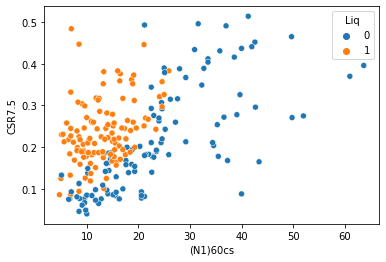

In [6]:
sn.scatterplot(x = df['(N1)60cs'], y = df['CSR7.5'], hue = df['Liq'])


In [7]:
df[['(N1)60cs', 'CSR7.5', 'Liq']].sample(5)

,(N1)60cs,CSR7.5,Liq
104,13.3,0.381,1
122,5.4,0.231,1
105,18.7,0.159,0
160,15.3,0.177,1
202,42.0,0.441,0


In [8]:
df.Liq.value_counts()

1    118
0    112
Name: Liq, dtype: int64

<AxesSubplot:xlabel='(N1)60cs', ylabel='CSR7.5'>

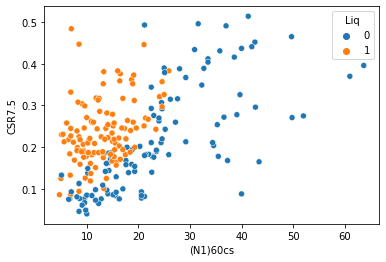

In [9]:
sn.scatterplot(x = df['(N1)60cs'], y = df['CSR7.5'], hue = df['Liq'])

In [10]:
df[['(N1)60cs', 'CSR7.5', 'Liq']].describe()

,(N1)60cs,CSR7.5,Liq
count,230.000000,230.000000,230.000000
mean,18.109130,0.224204,0.513043
std,10.488049,0.103926,0.500920
min,4.700000,0.040000,0.000000
25%,10.325000,0.159500,0.000000
50%,15.300000,0.210000,1.000000
75%,22.575000,0.277500,1.000000
max,63.700000,0.514000,1.000000


## Using Pre-trained Model

In [11]:
def MinMaxNormalization(data):
    # MinMax Normalization
    scaler = MinMaxScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    minmax_normalized = scaler.transform(data)
    return minmax_normalized

In [12]:
features = df[['(N1)60cs', 'CSR7.5']]
target = df['Liq']

In [13]:
normalized_features = MinMaxNormalization(features)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size = 0.8)

In [15]:
# loading the previously saved model.
pre_trained_model = tf.keras.models.load_model('main_model.h5')
#pre_trained_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
pre_trained_model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 4ms/step - loss: 0.8053 - accuracy: 0.5870
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.7967 - accuracy: 0.5870
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 0.7795 - accuracy: 0.5870
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 0.7595 - accuracy: 0.5870
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.6087
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.6087
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6087
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6522
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.6957
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6957
Epoch 11/500
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8043
Epoch 85/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8043
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8043
Epoch 87/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8043
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8043
Epoch 89/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8043
Epoch 90/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8043
Epoch 91/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8043
Epoch 92/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8043
Epoch 93/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8043
Epoch 94/500
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8043
Epoch 168/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8043
Epoch 169/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8043
Epoch 170/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8043
Epoch 171/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8043
Epoch 172/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8043
Epoch 173/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.8043
Epoch 174/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8043
Epoch 175/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8043
Epoch 176/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8043
Epoch 177/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8043
Epoch 250/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8043
Epoch 251/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8043
Epoch 252/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8043
Epoch 253/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8043
Epoch 254/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8043
Epoch 255/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8043
Epoch 256/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8043
Epoch 257/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8043
Epoch 258/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8043
Epoch 259/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8043
Epoch 332/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8043
Epoch 333/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8043
Epoch 334/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8043
Epoch 335/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8043
Epoch 336/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8043
Epoch 337/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8043
Epoch 338/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8043
Epoch 339/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8043
Epoch 340/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8043
Epoch 341/500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8043
Epoch 414/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8043
Epoch 415/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8043
Epoch 416/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8043
Epoch 417/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8043
Epoch 418/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8043
Epoch 419/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8043
Epoch 420/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8043
Epoch 421/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8043
Epoch 422/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8043
Epoch 423/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8261
Epoch 496/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8261
Epoch 497/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8261
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8261
Epoch 499/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8261
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8261


In [16]:
test_loss, test_accuracy = pre_trained_model.evaluate(normalized_features, target)

8/8 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8217


In [17]:
y_predictions = pre_trained_model.predict(normalized_features)

In [18]:
for i in range(len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

In [19]:
print("ACCURACY = ",accuracy_score(target, y_predictions))
print("RECALL = ",recall_score(target, y_predictions))
print("F1-Score = ",f1_score(target, y_predictions))
print("Precision = ",precision_score(target, y_predictions))

ACCURACY =  0.8217391304347826
RECALL =  0.8898305084745762
F1-Score =  0.8366533864541832
Precision =  0.7894736842105263


<AxesSubplot:>

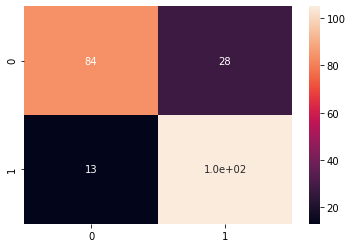

In [20]:
sn.heatmap(confusion_matrix(target, y_predictions), annot = True)

In [22]:
#Cross Validation Score

kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
recalls = []
f1scores = []
precisions = []
for train, test in kf.split(df[['(N1)60cs', 'CSR7.5','Liq']]):
    train_df = df.loc[train]
    test_df = df.loc[test]
    
    pre_trained_model = tf.keras.models.load_model('main_model.h5')
    pre_trained_model.fit(MinMaxNormalization(test_df[['(N1)60cs', 'CSR7.5']]), test_df['Liq'], epochs = 500)

    y_predictions = pre_trained_model.predict(MinMaxNormalization(train_df[['(N1)60cs', 'CSR7.5']]))
    for i in range(len(y_predictions)):
        if y_predictions[i] < 0.5:
            y_predictions[i] = 0
        else:
            y_predictions[i] = 1

    accuracies.append(accuracy_score(train_df['Liq'], y_predictions))
    recalls.append(recall_score(train_df['Liq'], y_predictions))
    f1scores.append(f1_score(train_df['Liq'], y_predictions))
    precisions.append(precision_score(train_df['Liq'], y_predictions))


    
print("Accuracies:", accuracies)
print("Recalls:", recalls)
print("f1scores:", f1scores)
print("precisions:", precisions)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9105 - accuracy: 0.5435
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8973 - accuracy: 0.5652
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 0.5652
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.5652
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.5652
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7668 - accuracy: 0.5652
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.5870
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5870
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.6087
Epoch 10/500
2/2 [==============================] - 0s 994us/step - loss: 0.6119 - accuracy: 0.6739
Epoch 11/500
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8696
Epoch 85/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8696
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8696
Epoch 87/500
2/2 [==============================] - 0s 999us/step - loss: 0.4090 - accuracy: 0.8696
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8478
Epoch 89/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8478
Epoch 90/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8478
Epoch 91/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8696
Epoch 92/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8696
Epoch 93/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8696
Epoch 94/500
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8478
Epoch 167/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8478
Epoch 168/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8478
Epoch 169/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8478
Epoch 170/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8478
Epoch 171/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8478
Epoch 172/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8478
Epoch 173/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8478
Epoch 174/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8478
Epoch 175/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8478
Epoch 176/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8696
Epoch 249/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8696
Epoch 250/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8696
Epoch 251/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8696
Epoch 252/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8696
Epoch 253/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8696
Epoch 254/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8696
Epoch 255/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8696
Epoch 256/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8696
Epoch 257/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8696
Epoch 258/500
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8696
Epoch 331/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8696
Epoch 332/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8696
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8696
Epoch 334/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8696
Epoch 335/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8696
Epoch 336/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8696
Epoch 337/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8696
Epoch 338/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8696
Epoch 339/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8696
Epoch 340/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8696
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8696
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8696
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8696
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8696
Epoch 417/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8696
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8696
Epoch 419/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8696
Epoch 420/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8696
Epoch 421/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8696
Epoch 422/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8696
Epoch 495/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8696
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8696
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8696
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8696
Epoch 499/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8696
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8696
Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.4565
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 1.0838 - accuracy: 0.4565
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.4565
Epoch 4/500
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8043
Epoch 78/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8043
Epoch 79/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8043
Epoch 80/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8043
Epoch 81/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8043
Epoch 82/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8043
Epoch 83/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8043
Epoch 84/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.8043
Epoch 85/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8043
Epoch 86/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8043
Epoch 87/500
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8043
Epoch 161/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8043
Epoch 162/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8043
Epoch 163/500
2/2 [==============================] - 0s 990us/step - loss: 0.4305 - accuracy: 0.8043
Epoch 164/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7826
Epoch 165/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7826
Epoch 166/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7826
Epoch 167/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7826
Epoch 168/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7826
Epoch 169/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7826
Epoch 170/500
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8261
Epoch 243/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8261
Epoch 244/500
2/2 [==============================] - 0s 6ms/step - loss: 0.4254 - accuracy: 0.8261
Epoch 245/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4254 - accuracy: 0.8261
Epoch 246/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8261
Epoch 247/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8261
Epoch 248/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8261
Epoch 249/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8261
Epoch 250/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8261
Epoch 251/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8261
Epoch 252/500
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8043
Epoch 325/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8043
Epoch 326/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8043
Epoch 327/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8043
Epoch 328/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8043
Epoch 329/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8261
Epoch 330/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8261
Epoch 331/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8261
Epoch 332/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8261
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8261
Epoch 334/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8261
Epoch 407/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8261
Epoch 408/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8261
Epoch 409/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8261
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8261
Epoch 411/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8261
Epoch 412/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8261
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8261
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8261
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8261
Epoch 416/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8043
Epoch 489/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8043
Epoch 490/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8043
Epoch 491/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8043
Epoch 492/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8043
Epoch 493/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8261
Epoch 494/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8261
Epoch 495/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8261
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8261
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8261
Epoch 498/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8478
Epoch 72/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8478
Epoch 73/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8478
Epoch 74/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8478
Epoch 75/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8478
Epoch 76/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8478
Epoch 77/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8478
Epoch 78/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8478
Epoch 79/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8478
Epoch 80/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8478
Epoch 81/500
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8478
Epoch 155/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8478
Epoch 156/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8478
Epoch 157/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8478
Epoch 158/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8478
Epoch 159/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8478
Epoch 160/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8478
Epoch 161/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8478
Epoch 162/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8478
Epoch 163/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8478
Epoch 164/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8478
Epoch 237/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8478
Epoch 238/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8478
Epoch 239/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8478
Epoch 240/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8478
Epoch 241/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8478
Epoch 242/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8478
Epoch 243/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8478
Epoch 244/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8478
Epoch 245/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8478
Epoch 246/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8478
Epoch 319/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8478
Epoch 320/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8478
Epoch 321/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8478
Epoch 322/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8478
Epoch 323/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8261
Epoch 324/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8478
Epoch 325/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8478
Epoch 326/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8478
Epoch 327/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8478
Epoch 328/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8478
Epoch 401/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8478
Epoch 402/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8478
Epoch 403/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8478
Epoch 404/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8478
Epoch 405/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8478
Epoch 406/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8478
Epoch 407/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8478
Epoch 408/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8478
Epoch 409/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8478
Epoch 410/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8478
Epoch 483/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8478
Epoch 484/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8478
Epoch 485/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8478
Epoch 486/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8478
Epoch 487/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8478
Epoch 488/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8478
Epoch 489/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8478
Epoch 490/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8478
Epoch 491/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8478
Epoch 492/500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.9130
Epoch 66/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.9130
Epoch 67/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9130
Epoch 68/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9130
Epoch 69/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.9130
Epoch 70/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.9130
Epoch 71/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.9130
Epoch 72/500
2/2 [==============================] - 0s 998us/step - loss: 0.3277 - accuracy: 0.9130
Epoch 73/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.9130
Epoch 74/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.9130
Epoch 75/500
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.9130
Epoch 149/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.9130
Epoch 150/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.9130
Epoch 151/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.9130
Epoch 152/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.9130
Epoch 153/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.9130
Epoch 154/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.9130
Epoch 155/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.9130
Epoch 156/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.9130
Epoch 157/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.9130
Epoch 158/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9130
Epoch 231/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.9130
Epoch 232/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.9130
Epoch 233/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.9130
Epoch 234/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9130
Epoch 235/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.9130
Epoch 236/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.9130
Epoch 237/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.9130
Epoch 238/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9130
Epoch 239/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9130
Epoch 240/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.9130
Epoch 313/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.9130
Epoch 314/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.9130
Epoch 315/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.9130
Epoch 316/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.9130
Epoch 317/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.9130
Epoch 318/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.9130
Epoch 319/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3110 - accuracy: 0.9130
Epoch 320/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.9130
Epoch 321/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.9130
Epoch 322/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.9130
Epoch 395/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.9130
Epoch 396/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.9130
Epoch 397/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.9130
Epoch 398/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9130
Epoch 399/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9130
Epoch 400/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.9130
Epoch 401/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.9130
Epoch 402/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.9130
Epoch 403/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9130
Epoch 404/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9130
Epoch 477/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9130
Epoch 478/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9130
Epoch 479/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.9130
Epoch 480/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.9130
Epoch 481/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.9130
Epoch 482/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.9130
Epoch 483/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9130
Epoch 484/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.9130
Epoch 485/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.9130
Epoch 486/500
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8696
Epoch 60/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8696
Epoch 61/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8696
Epoch 62/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8696
Epoch 63/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8696
Epoch 64/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8696
Epoch 65/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8696
Epoch 66/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8696
Epoch 67/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8696
Epoch 68/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8696
Epoch 69/500
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8261
Epoch 143/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8261
Epoch 144/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8261
Epoch 145/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8261
Epoch 146/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8261
Epoch 147/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8261
Epoch 148/500
2/2 [==============================] - 0s 993us/step - loss: 0.3265 - accuracy: 0.8261
Epoch 149/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8478
Epoch 150/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8478
Epoch 151/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8478
Epoch 152/500
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8261
Epoch 225/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8261
Epoch 226/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8261
Epoch 227/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8261
Epoch 228/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8261
Epoch 229/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8261
Epoch 230/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8261
Epoch 231/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8261
Epoch 232/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8261
Epoch 233/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8261
Epoch 234/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8261
Epoch 307/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 308/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 309/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 310/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 311/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 312/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8261
Epoch 313/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8261
Epoch 314/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8261
Epoch 315/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8261
Epoch 316/500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8261
Epoch 389/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8261
Epoch 390/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8261
Epoch 391/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8261
Epoch 392/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8261
Epoch 393/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8261
Epoch 394/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.8261
Epoch 395/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8261
Epoch 396/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8261
Epoch 397/500
2/2 [==============================] - 0s 998us/step - loss: 0.3088 - accuracy: 0.8261
Epoch 398/500
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8261
Epoch 471/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8261
Epoch 472/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8261
Epoch 473/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8261
Epoch 474/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8261
Epoch 475/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8261
Epoch 476/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8261
Epoch 477/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8261
Epoch 478/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8261
Epoch 479/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8261
Epoch 480/500
2/2 [=====

## Using Juang 2002 SPT-based Model

In [23]:
#Assessing Probability-based Methods for Liquefaction Potential Evaluation

In [24]:
PL_Juang = pd.DataFrame(1 / (1 + np.exp(-(10.1129 - (0.2572 * df['(N1)60cs']) + (3.4825 * df['ln(CSR7.5)']) ))), columns = ['PL'] )

In [25]:
for i in range(len(PL_Juang)):
    if PL_Juang.loc[i,'PL'] > 0.5:
        PL_Juang.loc[i,'Liq'] = 1
    else:
        PL_Juang.loc[i,'Liq'] = 0

In [26]:
PL_Juang.sample(5)

,PL,Liq
199,0.391251,0.0
55,0.169805,0.0
138,0.021639,0.0
102,0.948959,1.0
189,0.425310,0.0


In [27]:
print("Juang's accuracy: ", accuracy_score(target, PL_Juang['Liq']))
print("Juang's recall: ", recall_score(target, PL_Juang['Liq']))
print("Juang's F1-score: ", f1_score(target, PL_Juang['Liq']))
print("Juang's precision: ", precision_score(target, PL_Juang['Liq']))

Juang's accuracy:  0.8521739130434782
Juang's recall:  0.8559322033898306
Juang's F1-score:  0.8559322033898306
Juang's precision:  0.8559322033898306


<AxesSubplot:>

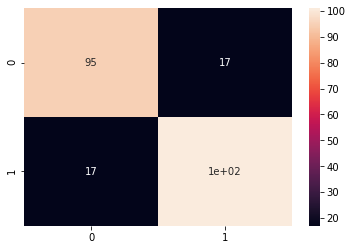

In [28]:
sn.heatmap(confusion_matrix(target, PL_Juang['Liq']), annot = True)